# Global Kp Index

The purpose of this notebook is to plot in a bar graph of the Kp index of all the events at the time of such meteor fell.

|ID|Date|Time|
|--|----|----|
|GLM-00|2019-02-01|18:17:09|
|GLM-01|2019-05-23|16:36:18|
|GLM-02|2019-07-18|14:30:30|
|GLM-03|2019-08-10|11:18:48|
|GLM-04|2019-10-03|07:55:33|
|GLM-05|2019-10-09|06:08:11|
|GLM-06|2019-11-16|09:36:04|
|GLM-07|2019-11-17|15:36:01|
|GLM-08|2019-11-19|07:57:40|
|GLM-09|2019-11-26|13:23:20|
|GLM-10|2019-12-04|09:42:54|
|GLM-11|2019-12-15|14:50:49|
|GLM-12|2019-12-29|16:16:35|
|GLM-13|2020-01-03|14:10:17|
|GLM-14|2020-01-06|16:39:27|
|GLM-15|2020-01-15|15:00:33|
|GLM-16|2020-02-12|09:25:40|
|GLM-17|2020-03-03|12:33:27|
|GLM-18|2020-03-31|19:31:52|
|GLM-19|2020-04-08|16:25:28|
|GLM-20|2020-04-18|17:43:25|
|GLM-21|2020-04-20|16:05:22|
|GLM-22|2020-04-25|11:03:09|
|GLM-23|2020-04-28|05:43:16|
|GLM-24|2020-05-08|10:06:16|
|GLM-25|2020-07-15|19:58:28|
|GLM-26|2020-08-07|13:29:57|
|GLM-27|2020-09-13|16:41:59|
|GLM-28|2020-09-30|12:28:11|
|GLM-29|2020-11-16|09:36:04|
|GLM-30|2020-11-17|12:53:41|
|GLM-31|2020-12-19|10:18:14|
|GLM-32|2020-12-23|09:43:01|
|GLM-33|2020-12-29|15:20:54|
|GLM-34|2021-03-31|09:01:17|
|USG-01|1995-08-05|17:14:10|
|USG-02|1996-07-12|14:04:45|
|USG-03|1997-10-09|18:47:15|
|USG-04|2000-01-18|08:33:58|
|USG-05|2000-08-25|01:12:25|
|USG-06|2005-11-15|05:19:07|
|USG-07|2015-07-19|07:06:26|
|USG-09|2019-06-22|21:25:48|

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob

## Initialize bolides data

In [3]:
dates = ["1995-08-05", "1996-07-12", "1997-10-09", "2000-01-18", "2000-08-25", "2005-11-15", "2015-07-19", "2019-02-01", 
         "2019-05-23", "2019-06-22", "2019-07-18", "2019-08-10", "2019-10-03", "2019-10-09", "2019-11-16", "2019-11-17", 
         "2019-11-19", "2019-11-26", "2019-12-04", "2019-12-15", "2019-12-29", "2020-01-03", "2020-01-06", "2020-01-15", 
         "2020-02-12", "2020-03-03", "2020-03-31", "2020-04-08", "2020-04-18", "2020-04-20", "2020-04-25", "2020-04-28", 
         "2020-05-08", "2020-07-15", "2020-08-07", "2020-09-13", "2020-09-30", "2020-11-16", "2020-11-17", "2020-12-19", 
         "2020-12-23", "2020-12-29", "2021-03-31"]

times = {"1995-08-05":17+14/60.+10/3600., "1996-07-12":14+4./60.+45/3600., "1997-10-09":18+47/60.+15/3600., 
         "2000-01-18":8.+33/60.+58/3600., "2000-08-25":1.+12/60.+25/3600., "2005-11-15":5.+19/60.+7./3600., 
         "2015-07-19":7.+6./60.+26/3600., "2019-02-01":18+17/60.+9./3600., "2019-05-23":16+36/60.+18/3600., 
         "2019-06-22":21+25/60.+48/3600., "2019-07-18":14+30/60.+30/3600., "2019-08-10":11+18/60.+48/3600., 
         "2019-10-03":7.+55/60.+33/3600., "2019-10-09":6.+8./60.+11/3600., "2019-11-16":9.+36/60.+4./3600.,
         "2019-11-17":15+36/60.+1./3600., "2019-11-19":7.+57/60.+40/3600., "2019-11-26":13+23/20.+48/3600., 
         "2019-12-04":9.+42/60.+48/3600., "2019-12-15":14+50/60.+49/3600., "2019-12-29":16+16/60.+35/3600.,
         "2020-01-03":14+10/60.+17/3600., "2020-01-06":16+39/60.+27/3600., "2020-01-15":15+0./60.+33/3600., 
         "2020-02-12":9.+25/60.+40/3600., "2020-03-03":12+33/60.+27/3600., "2020-03-31":19+31/60.+52/3600., 
         "2020-04-08":16+25/60.+28/3600., "2020-04-18":17+43/60.+25/3600., "2020-04-20":15+5./60.+22/3600.,
         "2020-04-25":11+3./60.+9./3600., "2020-04-28":5.+43/60.+16/3600., "2020-05-08":10+6./60.+16/3600., 
         "2020-07-15":19+58/60.+28/3600., "2020-08-07":13+29/60.+57/3600., "2020-09-13":16+41/60.+59/3600., 
         "2020-09-30":12+28/60.+11/3600., "2020-11-16":9.+35/60.+4./3600., "2020-11-17":12+53/60.+41/3600.,
         "2020-12-19":10+18/60.+14/3600., "2020-12-23":9.+43/60.+1./3600., "2020-12-29":15+20/60.+54/3600., 
         "2021-03-31":9.+1./60.+17/3600.}

## open ftp files

In [21]:
ftp_files = glob.glob("*DGD.txt")
ftp_files

['2019Q1_DGD.txt',
 '2020Q1_DGD.txt',
 '2020Q4_DGD.txt',
 '1996_DGD.txt',
 '2019Q3_DGD.txt',
 '2020Q3_DGD.txt',
 '2021Q1_DGD.txt',
 '2019Q2_DGD.txt',
 '2019Q4_DGD.txt',
 '1997_DGD.txt',
 '2020Q2_DGD.txt',
 '2015_DGD.txt',
 '2005_DGD.txt',
 '2000_DGD.txt',
 '1995_DGD.txt']

In [35]:
ftp_dict = {"1995-08-05":ftp_files[-1], "1996-07-12":ftp_files[3], "1997-10-09":ftp_files[9], 
         "2000-01-18":ftp_files[-2], "2000-08-25":ftp_files[-2], "2005-11-15":ftp_files[-3], 
         "2015-07-19":ftp_files[-4], "2019-02-01":ftp_files[0], "2019-05-23":ftp_files[7], 
         "2019-06-22":ftp_files[7], "2019-07-18":ftp_files[4], "2019-08-10":ftp_files[4], 
         "2019-10-03":ftp_files[8], "2019-10-09":ftp_files[8], "2019-11-16":ftp_files[8],
         "2019-11-17":ftp_files[8], "2019-11-19":ftp_files[8], "2019-11-26":ftp_files[8], 
         "2019-12-04":ftp_files[8], "2019-12-15":ftp_files[8], "2019-12-29":ftp_files[8],
         "2020-01-03":ftp_files[1], "2020-01-06":ftp_files[1], "2020-01-15":ftp_files[1], 
         "2020-02-12":ftp_files[1], "2020-03-03":ftp_files[1], "2020-03-31":ftp_files[1], 
         "2020-04-08":ftp_files[-5], "2020-04-18":ftp_files[-5], "2020-04-20":ftp_files[-5],
         "2020-04-25":ftp_files[-5], "2020-04-28":ftp_files[-5], "2020-05-08":ftp_files[-5], 
         "2020-07-15":ftp_files[5], "2020-08-07":ftp_files[5], "2020-09-13":ftp_files[5], 
         "2020-09-30":ftp_files[5], "2020-11-16":ftp_files[2], "2020-11-17":ftp_files[2],
         "2020-12-19":ftp_files[2], "2020-12-23":ftp_files[2], "2020-12-29":ftp_files[2], 
         "2021-03-31":ftp_files[6]}

In [50]:
mdict = {"01":"01", "02":"02", "03":"03", "04":"04", "05":"05", "06":"06", "07":"07", "08":"08", "09":"09", 
         "10":"10", "11":"11", "12":"12", "Jan":"01", "Feb":"02", "Mar":"03", "Apr":"04", "May":"05", "Jun":"06",
        "Jul":"07", "Aug": "08", "Sep":"09", "Oct":"10", "Nov":"11", "Dec":"12"}

In [87]:
Kp =[]
for date in dates:
    f = open(ftp_dict[date], "r")
    for i in range(12):
        f.readline()
    raw_data = f.readlines()
    for line in raw_data:
        k_date = line.split()[0:3]
        if (ftp_dict[date][0:4]=="1995")|(ftp_dict[date][0:4]=="1996"):
            day, month, year = k_date[0], k_date[1], "19"+k_date[2]
            Kp_Arr = line.split()[-1]
            Kp_arr = Kp_Arr.split("-")
        else:
            year, month, day = k_date[0], k_date[1], k_date[2]
            Kp_arr = line.split()[-8:]
        kdate = "{}-{}-{}".format(year, mdict[month], day)
        if kdate == date:
            if times[date] < 3.:
                Kp.append(int(Kp_arr[0]))
            elif times[date] < 6.:
                Kp.append(int(Kp_arr[1]))
            elif times[date] < 9.:
                Kp.append(int(Kp_arr[2]))
            elif times[date] < 12.:
                Kp.append(int(Kp_arr[3]))
            elif times[date] < 15.:
                Kp.append(int(Kp_arr[4]))
            elif times[date] < 18.:
                Kp.append(int(Kp_arr[-3]))
            elif times[date] < 21.:
                Kp.append(int(Kp_arr[-2]))
            else:
                Kp.append(int(Kp_arr[-1]))

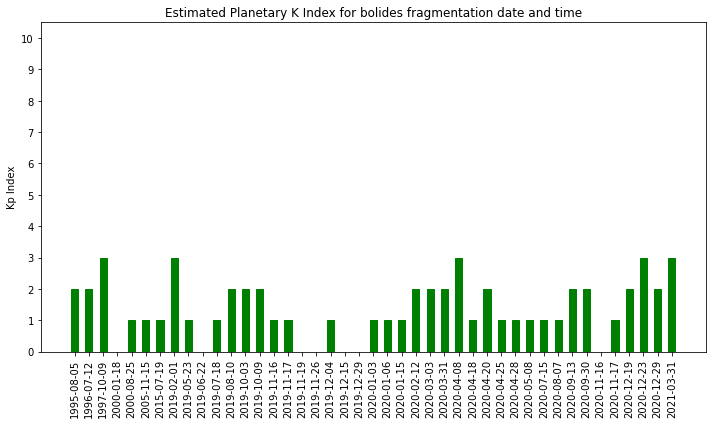

In [109]:
x = np.arange(len(Kp))
fig = plt.figure()
ax = fig.add_subplot(111)
bar = ax.bar(x, Kp, width=0.5)
for i,k in enumerate(Kp):
    if k ==4:
        bar[i].set_color("y")
    elif k > 4:
        bar[i].set_color("r")
    else:
        bar[i].set_color("g")
ax.set_ylim(0, 10.5)
ax.set_yticks(np.arange(11))
ax.set_ylabel("Kp Index")
ax.set_xticks(x, dates, rotation=90)
ax.set_title("Estimated Planetary K Index for bolides fragmentation date and time")
fig.set_size_inches(10, 6)
fig.tight_layout()
fig.savefig("sample_KP_index.pdf");